# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'1.10.0+cu111'

### 초기화 되지 않은 행렬 

In [3]:
x = torch.empty(4,2)
print(x)

tensor([[2.2785e-08, 3.0892e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 3.0892e-41],
        [1.1578e+27, 1.1362e+30]])


In [4]:
x.shape

torch.Size([4, 2])

### 무작위로 초기화된 행렬

In [5]:
x = torch.rand(4,2)
print(x)

tensor([[0.1022, 0.7555],
        [0.4304, 0.2046],
        [0.2702, 0.2075],
        [0.3359, 0.2857]])


### dtype이 long, 0으로 채워진 텐서

In [6]:
x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [7]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


In [8]:
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [9]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.4902, -0.6781,  0.1252,  1.7268],
        [ 0.6634,  1.4317, -0.3425,  0.6732]])


### 텐서의 크기

In [10]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [11]:
print(x)

tensor([[-0.4902, -0.6781,  0.1252,  1.7268],
        [ 0.6634,  1.4317, -0.3425,  0.6732]])


In [12]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.0855, 0.2226, 0.8556, 0.2117],
        [0.0438, 0.9734, 0.5424, 0.0146]])
tensor([[-0.4046, -0.4555,  0.9807,  1.9385],
        [ 0.7072,  2.4051,  0.1999,  0.6877]])


### 덧셈2

In [13]:
print(torch.add(x,y))

tensor([[-0.4046, -0.4555,  0.9807,  1.9385],
        [ 0.7072,  2.4051,  0.1999,  0.6877]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [14]:
result = torch.empty(2,4)
torch.add(x,y, out = result)
print(result)

tensor([[-0.4046, -0.4555,  0.9807,  1.9385],
        [ 0.7072,  2.4051,  0.1999,  0.6877]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

- inplace -> add_ -> y값을 대체 해버림

In [15]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[-0.4902, -0.6781,  0.1252,  1.7268],
        [ 0.6634,  1.4317, -0.3425,  0.6732]])
tensor([[0.0855, 0.2226, 0.8556, 0.2117],
        [0.0438, 0.9734, 0.5424, 0.0146]])
tensor([[-0.4046, -0.4555,  0.9807,  1.9385],
        [ 0.7072,  2.4051,  0.1999,  0.6877]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [16]:
x = torch.Tensor([[1,3], 
                  [5,7]])

y = torch.Tensor([[2,4],
                  [6,8]])

print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [17]:
x = torch.Tensor([[1,3], 
                  [5,7]])

y = torch.Tensor([[2,4],
                  [6,8]])

print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [18]:
x = torch.Tensor([[1,3], 
                  [5,7]])

y = torch.Tensor([[2,4],
                  [6,8]])

print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [19]:
x = torch.Tensor([[1,3], 
                  [5,7]])

y = torch.Tensor([[2,4],
                  [6,8]])

print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [20]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [21]:
print(x[:,1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [22]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1)

print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


In [23]:
print(x)
print(y)
print(z)

tensor([[ 0.7698,  0.2754,  0.2320, -0.8702, -0.0634],
        [ 0.0891, -0.4303, -0.3206,  0.0263, -0.3109],
        [ 0.0676,  0.8692, -0.9383,  2.0667, -0.5463],
        [-0.5750,  0.2749, -0.1204,  0.3635, -0.3783]])
tensor([ 0.7698,  0.2754,  0.2320, -0.8702, -0.0634,  0.0891, -0.4303, -0.3206,
         0.0263, -0.3109,  0.0676,  0.8692, -0.9383,  2.0667, -0.5463, -0.5750,
         0.2749, -0.1204,  0.3635, -0.3783])
tensor([[ 0.7698,  0.2754,  0.2320, -0.8702],
        [-0.0634,  0.0891, -0.4303, -0.3206],
        [ 0.0263, -0.3109,  0.0676,  0.8692],
        [-0.9383,  2.0667, -0.5463, -0.5750],
        [ 0.2749, -0.1204,  0.3635, -0.3783]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [24]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.7771])
-0.7770899534225464
torch.float32


- 스칼라값 하나만 존재해야함 -> 2개 이상의 값을 받았을 때 Error 

In [25]:
x = torch.randn(2)
print(x)
# print(x.item()) -> error
print(x.dtype)

tensor([ 0.0995, -1.8199])
torch.float32


### squeeze 
- 차원을 축소(제거)

In [26]:
tensor = torch.rand(1,3,3)
tensor.shape

torch.Size([1, 3, 3])

In [27]:
print(tensor.shape)
print(tensor)

torch.Size([1, 3, 3])
tensor([[[0.4889, 0.0193, 0.7165],
         [0.5439, 0.3752, 0.2770],
         [0.1626, 0.1961, 0.9177]]])


In [28]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.4889, 0.0193, 0.7165],
        [0.5439, 0.3752, 0.2770],
        [0.1626, 0.1961, 0.9177]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [29]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.5151, 0.1580, 0.8121],
         [0.8447, 0.8263, 0.1190],
         [0.5940, 0.8828, 0.9351]]])
torch.Size([1, 3, 3])


In [30]:
t= tensor.unsqueeze(dim =0)

print(t)
print(t.shape)

tensor([[[[0.5151, 0.1580, 0.8121],
          [0.8447, 0.8263, 0.1190],
          [0.5940, 0.8828, 0.9351]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [31]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])
w = torch.FloatTensor([4,8])

print(torch.stack([x,y,z,w])) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.],
        [4., 8.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [32]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b), dim =0)

print(c)
print(c.size())

tensor([[[[-0.2878,  0.3742, -1.2014],
          [ 0.1206,  0.6575, -0.4711],
          [-0.3500,  0.3515,  0.7505]]],


        [[[ 0.6161,  1.1415, -0.9022],
          [-0.7327, -0.1736,  0.3621],
          [-0.4635, -0.7155,  0.3336]]]])
torch.Size([2, 1, 3, 3])


In [33]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim =1)

#dim 값에 따라 Concatenate 방향이 달라짐. 0 은 1번쨰, // 1은 2번째 // 2는 3번째 행을 기준으로 함.

print(c)
print(c.size())

tensor([[[-0.3886, -0.0915, -0.2724],
         [-1.4803, -1.0425, -1.8304],
         [ 1.5345, -0.0838,  1.4548],
         [-1.1327, -1.0461,  0.1004],
         [ 1.7786, -0.4406,  0.8130],
         [-1.3304,  0.9874, -0.0486]]])
torch.Size([1, 6, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [34]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.chunk(tensor,3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.6640, 0.0065, 0.3180, 0.5997, 0.4884, 0.7481],
        [0.8297, 0.8267, 0.8751, 0.2611, 0.5410, 0.6984],
        [0.0552, 0.2487, 0.2484, 0.2893, 0.2742, 0.7861]])
tensor([[0.6640, 0.0065],
        [0.8297, 0.8267],
        [0.0552, 0.2487]])
tensor([[0.3180, 0.5997],
        [0.8751, 0.2611],
        [0.2484, 0.2893]])
tensor([[0.4884, 0.7481],
        [0.5410, 0.6984],
        [0.2742, 0.7861]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [35]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)


tensor([[0.4688, 0.3569, 0.0133, 0.4591, 0.9293, 0.0461],
        [0.5881, 0.5549, 0.2414, 0.2139, 0.5224, 0.4205],
        [0.1375, 0.3513, 0.5702, 0.0400, 0.8352, 0.3259]])
tensor([[0.4688, 0.3569, 0.0133],
        [0.5881, 0.5549, 0.2414],
        [0.1375, 0.3513, 0.5702]])
tensor([[0.4591, 0.9293, 0.0461],
        [0.2139, 0.5224, 0.4205],
        [0.0400, 0.8352, 0.3259]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [36]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [37]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [38]:
## 메모리 공유 때문에 a만 값을 더해줘도 b에도 값이 들어감.
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [39]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)

np.add(a,1,out = a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [40]:
import torch

In [41]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.1633])
0.16334418952465057
torch.float32


In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device = device)
x = x.to(device)
z = x+y

print(device)
print(z)
print(z.to("cpu", torch.double))


cuda
tensor([1.1633], device='cuda:0')
tensor([1.1633], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [43]:
import torch

In [44]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [45]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [46]:
print(y.grad_fn)

In [47]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [48]:
a = torch.randn(3,3)
a = ((a*3)/(a-1))

print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b)
print(b.grad_fn)

False
True
tensor(423.7033, grad_fn=<SumBackward0>)


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [49]:
out.backward()

In [50]:
print(x.grad)
print(x)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [51]:
x = torch.randn(3, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
  y = y*2

  print(y)

tensor([ 5.5218, -1.4096,  3.7013], grad_fn=<MulBackward0>)
tensor([11.0437, -2.8193,  7.4026], grad_fn=<MulBackward0>)
tensor([22.0874, -5.6385, 14.8052], grad_fn=<MulBackward0>)
tensor([ 44.1747, -11.2770,  29.6104], grad_fn=<MulBackward0>)
tensor([ 88.3494, -22.5540,  59.2207], grad_fn=<MulBackward0>)
tensor([176.6988, -45.1081, 118.4414], grad_fn=<MulBackward0>)
tensor([353.3976, -90.2161, 236.8829], grad_fn=<MulBackward0>)
tensor([ 706.7953, -180.4323,  473.7657], grad_fn=<MulBackward0>)
tensor([1413.5906, -360.8646,  947.5314], grad_fn=<MulBackward0>)


In [52]:
v = torch.tensor([0.1, 1.0, 0.00001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [53]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [54]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [55]:
import torch

In [56]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [57]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [58]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn None


- $b = a + 2$

In [59]:
b = a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [60]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [61]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [62]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [63]:
print("a.data:" ,a.data)
print("a.grad:", a.grad)
print("a.grad_fn", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [64]:
print("b.data:" ,b.data)
print("b.grad:", b.grad)
print("b.grad_fn", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn <AddBackward0 object at 0x7f86ee1f4d90>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [65]:
print("c.data:" ,c.data)
print("c.grad:", c.grad)
print("c.grad_fn", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn <PowBackward0 object at 0x7f86ee21d4d0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [66]:
print("out.data:" ,out.data)
print("out.grad:", out.grad)
print("out.grad_fn", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn <SumBackward0 object at 0x7f86ee21cb50>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [67]:
x = torch.ones(3, requires_grad=True)
y = (x**2)
z = y**2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [68]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [69]:
print("x.data:" ,x.data)
print("x.grad:", x.grad)
print("x.grad_fn", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn None


In [70]:
print("y.data:" ,y.data)
print("y.grad:", y.grad)
#y의 grad값이 None인 이유는 ??
print("y.grad_fn", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn <PowBackward0 object at 0x7f87efc69f50>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [71]:
print("z.data:" ,z.data)
print("z.grad:", z.grad)
print("z.grad_fn", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn <AddBackward0 object at 0x7f86ee229e90>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [72]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [73]:
m = nn.Conv2d(16, 33, 3, stride=2)
#stride란 Convolution에서 filter를 몇 칸씩 이동시킬 것인가.

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
#padding 여백. 

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
#dilation이란 패딩 사이의 간격.

input = torch.randn(20,16,50,100)
print(input)
output = m(input)
print(output)

tensor([[[[-9.1811e-01,  1.5053e+00,  1.1642e+00,  ..., -1.5644e+00,
            1.1955e+00,  2.9912e-01],
          [-2.4238e-01, -1.0006e+00,  2.6096e-01,  ..., -9.2702e-01,
           -1.2764e+00,  7.6219e-01],
          [-3.2788e+00, -4.0332e-01,  3.8311e-01,  ..., -4.2029e-01,
           -3.6672e-01, -7.6104e-01],
          ...,
          [-3.9409e-01,  3.2110e-01,  2.6017e-01,  ...,  4.7180e-01,
           -4.3589e-01,  2.7477e-02],
          [ 1.8915e+00,  1.1266e+00,  8.1311e-01,  ...,  4.2224e-01,
            4.3922e-01,  8.2806e-02],
          [-1.4316e+00, -5.5390e-01,  5.6123e-01,  ...,  1.8529e+00,
            2.7331e-01, -2.1590e-01]],

         [[ 6.5263e-01, -6.7737e-01,  5.5406e-01,  ...,  4.3784e-01,
            1.9357e-01,  1.2094e+00],
          [-3.5918e-01,  4.0651e-01, -7.1941e-01,  ...,  2.5542e-01,
           -5.3903e-01, -2.1508e-01],
          [-4.7597e-01,  1.5491e+00, -2.2660e+00,  ...,  1.3434e+00,
            1.5262e+00,  6.9774e-01],
          ...,
     

In [74]:
print(input.shape)
print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 26, 100])


### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [75]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [76]:
filters = torch.randn(8,4,3,3)

In [77]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters ,padding=1)
print(conv.shape)

torch.Size([1, 8, 5, 5])


## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [78]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [79]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize(mean=(0.5,) ,std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [80]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [81]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform = transform
                                      )

testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform = transform
                                      )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [82]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size = 8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [83]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [84]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [85]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [86]:
image = torch_image.numpy()
image.shape

(28, 28)

In [87]:
label = labels[0].numpy()
label.shape
#결과값 하나 스칼라 이기 때문에 없음!!

()

In [88]:
label

array(6)

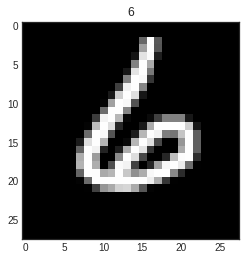

In [89]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [91]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [92]:
layer = nn.Conv2d(1,20, 5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [93]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [94]:
weight = weight.detach()

In [95]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

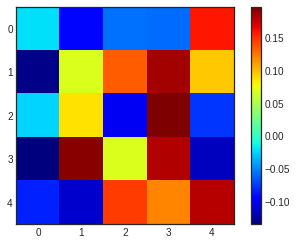

In [96]:
plt.imshow(weight[0,0, :, :], 'jet')
plt.colorbar()
plt.show()

In [97]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [98]:
input_image = torch.unsqueeze(images[0], dim=0)

In [99]:
output_data = layer(input_image)

In [100]:
output = output_data.data

In [101]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

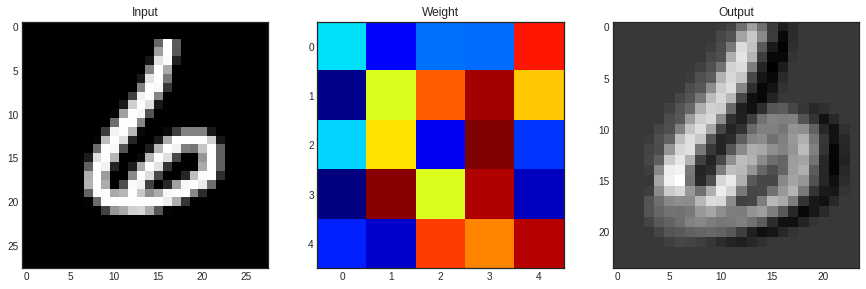

In [102]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], 'gray')

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [103]:
image.shape

(28, 28)

In [105]:
pool = F.max_pool2d(output, 2,2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [107]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

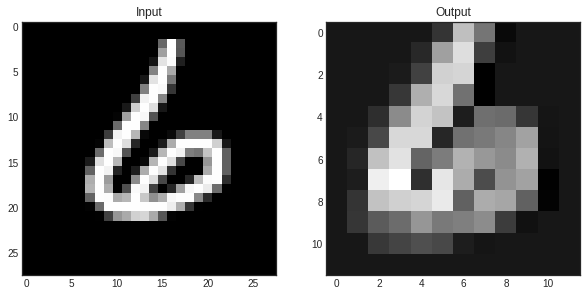

In [109]:
plt.figure(figsize= (10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image,'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0, :, :], 'gray')
plt.show()

#max값만 가져와서 출력한 결과.

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [110]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [111]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [113]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [114]:
lin

tensor([[ 0.6346, -0.0689,  0.6942,  0.3197, -0.5145,  0.5020,  1.1380, -0.0730,
         -0.2222, -0.6966]], grad_fn=<AddmmBackward0>)

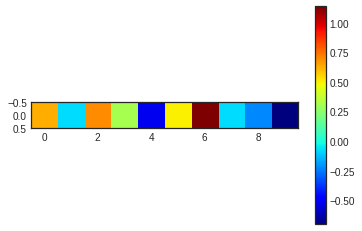

In [115]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [117]:
with torch.no_grad():
  flatten = image.view(1,28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [118]:
softmax

tensor([[0.0651, 0.0291, 0.1191, 0.0458, 0.0955, 0.2037, 0.1388, 0.1578, 0.1058,
         0.0392]])

In [119]:
np.sum(softmax.numpy())

0.9999999

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [120]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [121]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

# -> Conv2d를 통과한 layer가 Relu 함수를 통해 출력.

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

